## BIMM 143 Project 2 Final - Elisa Tien

#### Scientific Question 
Are PPAR receptor subsets mainly unique to humans or are they also present in other species, and how similar are the human PPAR receptors and their subsets to other species, and which species, if any? 

#### Scientific Hypothesis
If PPAR receptor subsets are not unique to humans and are significantly present in other species, then there will be species with PPAR receptors subsets that have high similarity rates >75% with humans PPAR receptors and subsets.

#### Protein
PPAR or Peroxisome proliterator-activated receptors are nuclear receptor proteins and ligand-activated transcription factors that play important roles in homeostasis and metabolic function. There are three subtypes of PPAR: PPAR Alpha, PPAR Delta, and PPAR Gamma. They are all involved in different functions. Branching off of the research paper in Project 1, PPAR Alpha receptors were required to be present and functional in order for the 10Z Hexadecinoic Acid to have anti-inflammatory effects by decreasing the IL6 levels. This was specfically PPAR Alpha, and PPAR Gamma and PPAR Delta did not have a role in this, so my research question and hypothesis branches off this phenomenon. I was then interested in whether or not PPAR Gamma and Delta were only present in humans, or if they also played roles in other species and not just PPAR Alpha. 


#### What Analyses were done

BLAST search
- BLAST, or Basic Local Alignment Search Tool, is used to find similarities between nucleotide and protein sequences. Running a BLAST search for a sequence can return back other strand of sequences that match it in similarity, and their percentages of similarity, how similar they are and where and what the alignments are. This can be performed through platforms like NCBI.

pairwise sequence alignment
- Pairwise sequence alignment is a bioinformatics method used to identify the similarities between two sequences, either DNA or protein. It is used to locate eactly where the similarities and matches are on the two strands of sequences. It also provides an alignment score, using a scoring system, given points for a match, and a potential deduction of points for a mismatch, depending on what it is set to. 

Dot plot
- Dot plots are a graphical method to display regions of simiilarity between two sequences. It is a similarity matrix to visualize this similarity, and exactly where the matches are. Dot plots typically have grid features, and a darkened grid represents a match between the nucleotides, with each sequence on one axis. The shape of the darkened grids are used to explaing the data. A full diagonal can be explained by a perfect match between the two sequences and other curves or patterns can be explained by shifts, deletions, and others. 


#### Packages
- __numpy__: Numpy is a library and a fundamental package that is primarily used for working with arrays and provides the means to work with a large variety of mathmatical functions. It includes multidimensional array objects, derived objects like matrices, and many operations on arrays. It is also able to perform linear algebra, statiscial operations, and more. The numpy array elements need to be the same data type. 
- __matplotlib__: Matplotlib is a library used primarily for plotting and creating interactive visualizationg in Python. It allows creating of figures, plots, axes, labels, tick marks, and all the details. It can plot numpy arrays and pandas dataframes. Matplotlib has a required dependency on numpy and uses its functions for numerical data and multi-dimensional arrays. Through matplotlib.pyplot as plt, it can generate line, pie, and bar plots with simple numbers. 
- __pylab__: Pylab is a module that usually gets installed with matplotlib and is a procedural interface to the matplotlib plotting library which is object oriented. It is a module that combines the plotting functionalisties of matplotlib.pyplot and the math and array features of numpy, and essentialy bulk imports both numpy and matplotlib.pyplot in just a single name space. 
- __Biopython__: Biopython contains a large collection of computational biology and bioinformatics tools. It's various modules can allow it to read in and write to a large variety of different formats of files and perform many tasks like sequence alignment and analyzing protein structure. Biopython can also be used for progammatic access to online databases like NCBI, which will be used in this project for BLAST searches.  Biopython needs to be installed. I used pip install for installation, but conda install works as well.

#### Data
The fasta files used in this project were all downloaded from NCBI. "PPAR Alpha", "PPAR Gamma", and "PPAR Delta" were all searched in the search engine of NCBI and filtered for homo sapien results. The first hit was downloaded as a fasta file. BLAST search results and files were saved as xml files through the code. 

#### Installing and importing needed packages

In [3]:
# intalling biopython
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing in all needed packages
import numpy as np
import matplotlib.pyplot as plt
import pylab
from Bio import AlignIO
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import pairwise2
from Bio.pairwise2 import format_alignment 

### Reading in data to perform BLAST searches

In the code below, we will be reading in fasta files downloaded from Uniprot. Fasta files are text-based formatted files of sequences of nucleotides or amino acids. It includes single-letter codes and the names of the sequences. "PPAR Alpha" was searched in NCBI and filtered for homosapiens. The first option was downloaded and used here. After loading in the fasta file data, a BLAST search was performed on it using NCBIWWW imported from Bio.Blast package from Biopython. The BLAST search results were then saved as an xml file. An XML file is an Extensible Markeup Language file format, which can be used to store, transmit, and reconstruct arbitrary data. It can include both text and tags which format the data. This data format can then be used to encode information for database records, documentation, and more. NCBIXML was imported from Bio.Blast in order to read the xml files. The BLAST search results were then displayed, and the first hit of a species that was not homo sapien was identified and extracted. This same process was done for the PPAR Gamma and PPAR Delta as well. 

#### PPAR Alpha

In [234]:
# read in the homo sapien PPAR Alpha fasta file from NCBI
# assign the homo sapien PPAR Alpha sequence to variable humanPPARA
# global variable

humanPPARA = open("sequence-2.fasta").read() 
#humanPPARA

In [4]:
# import NCBIWWW to perform BLAST searches 
from Bio.Blast import NCBIWWW

In [209]:
# perform BLAST search on homo sapien PPAR Alpha and assign the search to variable result_handle
# global variable

humanPPARA_results = NCBIWWW.qblast("blastn", "nt", humanPPARA) 
humanPPARA_results

In [210]:
# save the BLAST search results in an xml file

with open('humanPPARA_BLASTresults.xml', 'w') as save_file: 
    blast_results = humanPPARA_results.read()
    save_file.write(blast_results)

In [211]:
# import NCBIXML to read the xml files
from Bio.Blast import NCBIXML

# open xml file
humanPPARAxml = open("humanPPARA_BLASTresults.xml")
blast_record = NCBIXML.read(humanPPARAxml)

# display the hits based off of similarity
for hit in blast_record.descriptions: 
    print(hit.title)
    print(hit.e)
    

# the first hit of a different species that was not a homo sapien was gi|1848980636|ref|XM_034951726.1| PREDICTED: Pan paniscus peroxisome proliferator activated receptor alpha (PPARA), transcript variant X6, mRNA
# the Pan paniscus is an endangered great ape
# extract that file from NCBI for use in pairwise sequence alignment 

gi|2017363567|ref|NM_001393947.1| Homo sapiens peroxisome proliferator activated receptor alpha (PPARA), transcript variant 16, mRNA
0.0
gi|1677538777|ref|NM_005036.6| Homo sapiens peroxisome proliferator activated receptor alpha (PPARA), transcript variant 5, mRNA
0.0
gi|1677530536|ref|NM_001362872.2| Homo sapiens peroxisome proliferator activated receptor alpha (PPARA), transcript variant 8, mRNA
0.0
gi|1147680974|emb|LT736577.1| Human ORFeome Gateway entry vector pENTR223-PPARA, complete sequence
0.0
gi|823669937|gb|KR709799.1| Synthetic construct Homo sapiens clone CCSBHm_00006148 PPARA (PPARA) mRNA, encodes complete protein
0.0
gi|2217339894|ref|XM_047441430.1| PREDICTED: Homo sapiens peroxisome proliferator activated receptor alpha (PPARA), transcript variant X14, mRNA
0.0
gi|2217339892|ref|XM_047441429.1| PREDICTED: Homo sapiens peroxisome proliferator activated receptor alpha (PPARA), transcript variant X13, mRNA
0.0
gi|2217339890|ref|XM_047441428.1| PREDICTED: Homo sapiens per

In [233]:
# read in the Pan paniscus hit gi|1848980636|ref|XM_034951726.1| PREDICTED: Pan paniscus peroxisome proliferator activated receptor alpha (PPARA), transcript variant X6, mRNA
# this will be used for the pairwise sequence alignment

ApePPARA = open("ApePPARA.fasta").read() 
#ApePPARA

#### PPAR Gamma

In [232]:
# read in the homo sapien PPAR Gamma fasta file downloaded from NCBI
# assign the homo sapien PPAR Gamma sequence to variable humanPPARG
# global variable

humanPPARG = open("humanPPARGamma.fasta").read() 
#humanPPARG

In [227]:
# perform BLAST search on homo sapien PPAR Gamma and assign the search to variable humanPPARG_results
# global variable

humanPPARG_results = NCBIWWW.qblast("blastn", "nt", humanPPARG) 
humanPPARG_results

In [228]:
# save the BLAST search results in an xml file

with open('humanPPARG_BLASTresults.xml', 'w') as save_file: 
    PPARG_blast_results = humanPPARG_results.read()
    save_file.write(PPARG_blast_results)

In [229]:
# import NCBIXML to read the xml files
from Bio.Blast import NCBIXML

# open xml file
humanPPARGxml = open("humanPPARG_BLASTresults.xml")
blast_record = NCBIXML.read(humanPPARGxml)

# display the hits based off of similarity
for hit in blast_record.descriptions: 
    print(hit.title)
    print(hit.e)

gi|1743235135|ref|NM_015869.5| Homo sapiens peroxisome proliferator activated receptor gamma (PPARG), transcript variant 2, mRNA
0.0
gi|1711116|gb|U79012.1|HSU79012 Human ligand activated transcription factor PPARgamma2 mRNA, complete cds
0.0
gi|1432176|gb|U63415.1|HSU63415 Human peroxisome proliferator activated receptor gamma 2 mRNA, complete cds
0.0
gi|197692374|dbj|AB451337.1| Homo sapiens PPARG mRNA for peroxisome proliferative activated receptor gamma isoform 2, complete cds, clone: FLJ82517SAAN
0.0
gi|197692672|dbj|AB451486.1| Homo sapiens PPARG mRNA for peroxisome proliferative activated receptor gamma isoform 2, partial cds, clone: FLJ82517SAAF
0.0
gi|1367268168|ref|XM_016940489.2| PREDICTED: Pan troglodytes peroxisome proliferator activated receptor gamma (PPARG), transcript variant X1, mRNA
0.0
gi|1199768|dbj|D83233.1|HUMPPARG Homo sapiens mRNA for PPAR gamma2, complete cds
0.0
gi|1753067011|ref|XM_031009720.1| PREDICTED: Gorilla gorilla gorilla peroxisome proliferator activ

In [231]:
# the first hit of a different animal species that was not a homo sapien was gi|1367268168|ref|XM_016940489.2| PREDICTED: Pan troglodytes peroxisome proliferator activated receptor gamma (PPARG), transcript variant X1, mRNA
# the Pan troglodytes is a Chimpanzee which is a species of Great Ape
# extract that file from NCBI for use in pairwise sequence alignment 

ChimpPPARG = open("ChimpPPARG.fasta").read() 
#ChimpPPARG

#### PPAR Delta

In [236]:
# read in the human PPAR Delta fasta file downloaded from NCBI

humanPPARD = open("humanPPARDelta.fasta").read() 
#humanPPARD

In [213]:
# perform BLAST search on PPAR Delta homo sapien
PPARD_BLAST = NCBIWWW.qblast("blastn", "nt", humanPPARD) 
PPARD_BLAST

In [214]:
# save BLAST search results to xml file

with open("humanPPARD_BLASTresults.xml", 'w') as save_file: 
    humanPPARD_blast_results = PPARD_BLAST.read()
    save_file.write(humanPPARD_blast_results)

In [215]:
# open xml file
humanPPARD_handle = open("humanPPARD_BLASTresults.xml")
humanPPARD_blast_record = NCBIXML.read(humanPPARD_handle)

# display the hits based off of similarity
for hit in humanPPARD_blast_record.descriptions: 
    print(hit.title)
    print(hit.e)

gi|1889590225|ref|NM_001171819.2| Homo sapiens peroxisome proliferator activated receptor delta (PPARD), transcript variant 4, mRNA
0.0
gi|221041339|dbj|AK296425.1| Homo sapiens cDNA FLJ61623 complete cds, highly similar to Peroxisome proliferator-activated receptor delta
0.0
gi|1675060762|ref|NM_001171818.2| Homo sapiens peroxisome proliferator activated receptor delta (PPARD), transcript variant 3, mRNA
0.0
gi|1519313478|ref|NM_006238.5| Homo sapiens peroxisome proliferator activated receptor delta (PPARD), transcript variant 1, mRNA
0.0
gi|2217361901|ref|XM_047418931.1| PREDICTED: Homo sapiens peroxisome proliferator activated receptor delta (PPARD), transcript variant X23, mRNA
0.0
gi|2217361899|ref|XM_047418930.1| PREDICTED: Homo sapiens peroxisome proliferator activated receptor delta (PPARD), transcript variant X22, mRNA
0.0
gi|2217361897|ref|XM_047418929.1| PREDICTED: Homo sapiens peroxisome proliferator activated receptor delta (PPARD), transcript variant X21, mRNA
0.0
gi|2217

In [237]:
# the first hit of a different animal species that was not a homo sapien was gi|1849149315|ref|XM_034961917.1| PREDICTED: Pan paniscus peroxisome proliferator activated receptor delta (PPARD), transcript variant X5, mRNA
# the Pan paniscus is an endangered great ape
# extract that file from NCBI for use in pairwise sequence alignment 

ApePPARD = open("ApePPARD.fasta").read() 
#ApePPARD

#### Pairwise Sequence Alignment

In [239]:
# read in the parsed files with SeqIO to use as the length for pairwise sequence alignment
humanPPARAparse = list(SeqIO.parse("sequence-2.fasta", "fasta"))
ApePPARAparse = list(SeqIO.parse("ApePPARA.fasta", "fasta"))
humanPPARGparse = list(SeqIO.parse("humanPPARGamma.fasta", "fasta"))
ChimpPPARGparse = list(SeqIO.parse("ChimpPPARG.fasta", "fasta"))
humanPPARDparse = list(SeqIO.parse("humanPPARDelta.fasta", "fasta"))
ApePPARDparse = list(SeqIO.parse("ApePPARD.fasta", "fasta"))

In [289]:
# defining size variable that is used in the nested for loop below
#code check
#len(humanPPARAparse)
#len(humanPPARGparse)
#len(humanPPARDparse)
#len(ApePPARAparse)
#len(ApePPARDparse)
#len(ChimpPPARGparse)
# all outputs are the same of 1, so len(humanPPARAparse) will just be used as the default for all pairwise sequence alignments
# global variable
size = len(humanPPARAparse)
#print(size)

# initiating empty numpy matrix that is the length of the size variable
alignments_score = np.empty(shape=(size,size))

In [291]:
# pairwise sequence alignment function using a nested for loop
# perfoming pairwise sequence alignment on the two PPAR Delta data files 

def pairwise_seq(numpy_array, size):
    for i in range(size):
        for j in range(size):
        # Define the sequences that are being aligned X and Y
        # local variables
            X = humanPPARAparse[i].seq
            Y = ApePPARAparse[j].seq
            #code check
            #print(humanPPARAparse[i].id)

        # Identical matching bases have a score of 1, if not else 0
        # no gap penalties
        # perform pairwise sequence alignment and assign pairwise alignment score to the numpy array
        # local variable
            numpy_array[i,j] = int(pairwise2.align.globalxx(X, Y, score_only=True))

    return numpy_array

PPARA_alignment_scores = pairwise_seq(alignments_score, size)
PPARA_alignment_scores

array([[753.]])

In [266]:
# pairwise sequence alignment function using a nested for loop
# perfoming pairwise sequence alignment on the two PPAR Alpha data files 

def pairwise_seq2(numpy_array, size):
    for i in range(size):
        for j in range(size):
        # Define the sequences that are being aligned X and Y
        # local variables
            X = humanPPARDparse[i].seq
            Y = ApePPARDparse[j].seq
            #code check
            #print(humanPPARAparse[i].id)

        # Identical matching bases have a score of 1, if not else 0
        # no gap penalties
        # perform pairwise sequence alignment and assign pairwise alignment score to the numpy array
        # local variable
            numpy_array[i,j] = int(pairwise2.align.globalxx(X, Y, score_only=True))

    return numpy_array

PPARD_alignment_scores = pairwise_seq2(alignments_score, size)
PPARD_alignment_scores

array([[1204.]])

In [361]:
# pairwise sequence alignment function using a nested for loop
# perfoming pairwise sequence alignment on the two PPAR Delta data files 

def pairwise_seq3(numpy_array, size):
    for i in range(size):
        for j in range(size):
        # Define the sequences that are being aligned X and Y
        # local variables
            X = humanPPARGparse[i].seq
            Y = ChimpPPARGparse[j].seq
            #code check
            #print(humanPPARGparse[i].id)

        # Identical matching bases have a score of 1, if not else 0
        # no gap penalties
        # perform pairwise sequence alignment and assign pairwise alignment score to the numpy array
        # local variable
            numpy_array[i,j] = int(pairwise2.align.globalxx(X, Y, score_only=True))
        

    return numpy_array

PPARG_alignment_scores = pairwise_seq3(alignments_score, size)
PPARG_alignment_scores

array([[1510.]])

### Plotting the Results - Dot Plot
I chose to use a dot plot to display the similarities between the data. Dot plots are effective in visualizing the alignment between two sequences. It aligns each sequence on each axis and plots out the matching sequences using a shaded grid. Each black grid represents a match in the sequences, and it is visually easy to interpret the data once it has been plotted out by observing the shape, or lack thereof. I will be using a window size of 5, meaning it is assessing 5 characters per scan. 


In [366]:
# displaying alignments, uncomment to display 
# global variables
# these visuals help me extract the sections for the dot plot

PPARAalignment = pairwise2.align.globalxx(humanPPARA_seq, ApePPARA_seq)
#for alignment in PPARAalignment:
    #print(format_alignment(*alignment))

PPARGalignment = pairwise2.align.globalxx(humanPPARD_seq, ApePPARD_seq)  
#for alignment in PPARDalignment:
    #print(format_alignment(*alignment))
    
PPARDalignment = pairwise2.align.globalxx(humanPPARG_seq, ChimpPPARG_seq)
#for alignment in PPARGalignment:
   #print(format_alignment(*alignment))
    

In [332]:
# suggested by TA to only use a small section of nucletides for dot plot (around 10-20 nucleotides, I chose 20)
# since using the whole sequence is too large and would likely take too long to run, would crash, or be difficult to view
# extract section of 20 nucleotides with the closest match between human PPARA and Ape PPARA
# assign those sections to new variables, global variables
# dot plot will be performed on human PPAR Gamma and Chimp PPAR Gamma since that had the highest alignment score
# extracted from region 12638980 to 12639000

humanPPARG_section = str("TTATGCATATTGTTTATAAA")
ChimpPPARG_section = str("TTATGCATATTGTTTATAAA")

In [338]:
# creating a dotplot
# from local alignments

# set window size
window = 5

#assigning the data to the variables that will be plotted on the x and y axes
seq_one = humanPPARG_section
#print(seq_one)
seq_two = ChimpPPARG_section
#print(seq_two)

# saving the data in the dot plot 
# based on window size that was set to 5
# compares all i and all j, in the range of the lengths of the sequences 

data = [
    [(seq_one[i : i + window] != seq_two[j: j + window])
        for j in range(len(seq_one) - window)
    ]
    for i in range(len(seq_two) - window)
]


#print(data)

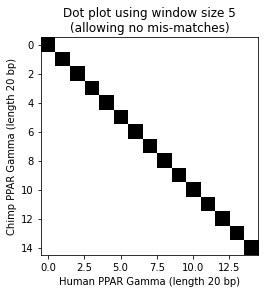

In [336]:
# creating and labeling dot plot
pylab.gray()
# load in data
pylab.imshow(data)
# create x axis labels
pylab.xlabel("%s (length %i bp)" % ("Human PPAR Gamma", len(humanPPARG_section)))
# create y axis labels
pylab.ylabel("%s (length %i bp)" % ("Chimp PPAR Gamma", len(ChimpPPARG_section)))
# create title for dot plot
pylab.title("Dot plot using window size %i\n(allowing no mis-matches)" % window)

# show dotplot 
pylab.show()

### Analysis of Results
The black blocks represents each matching pair. A perfect diagonal means that the two nucleotide sequences are a perfect match, meaning they are identical. A window size of 5 shows indicates that 5 nucleotides are being analyzed as once every analysis run. From this dotplot, the similarity between the Chimp PPAR Gamma sequence and the human PPAR Gamma sequence can be visualized, and it is clear from the perfect diagonal in this plot that this Chimp PPAR Gamma sequence section and this human PPAR Gamma sequence section are identical. This also correlates with their near perfect high pairwise sequence alignment score. The alignments score for homo sapien PPAR Gamma and Pan troglodytes PPAR Gamma was 1510 out of a perfect score of 1518, which is around 99.5% similarity. This is a near perfect, very high alignment score. The alignment score between Human PPAR Alpha and Ape PPAR Alpha was 753 out of a perfect score of 978, which was 77.0% similarity. The alignment score between Human PPAR Delta and Ape PPAR Delta was 1204 out of a perfect score of 1326, which was a 90.8% similarity, which was also high, but not as high as the similarity between the PPAR Gamma receptors. This supports my hypothesis that there are species with similar PPAR receptors and subsets, with similarity of at least an 75%. Overall, human PPAR receptors are in most smilarity with the Pan genus which includes the Apes and Chimpanzees. In particular, PPAR Gamma from the chimpanzees matches nearly identical with human PPAR Gamma, as seen from the pairwise seqence alignment as well as the dot plot. In conclusion, PPAR receptors and its three subsets are all not unique to humans and are not far in relation with other species. The human PPAR may have differences from other species, but there are species, especially the Pan genus, that have PPAR receptors with high similarity to humans, some near identical. 